<a href="https://colab.research.google.com/github/hongqin/EAM-sandboxc/blob/main/network-aging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipykernel

In [ ]:
!python -m ipykernel install --user --name myenv --display-name "Python (myenv)"

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Installed kernelspec myenv in /Users/hqin/Library/Jupyter/kernels/myenv


In [ ]:
import sys
print(sys.version)
print(sys.executable)


3.10.0 (v3.10.0:b494f5935c, Oct  4 2021, 14:59:19) [Clang 12.0.5 (clang-1205.0.22.11)]
/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10


In [ ]:
!pip list | grep numpy

In [ ]:
!pip install numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 543.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.4 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 36.4 MB/s eta 0:00:0000:0100:01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


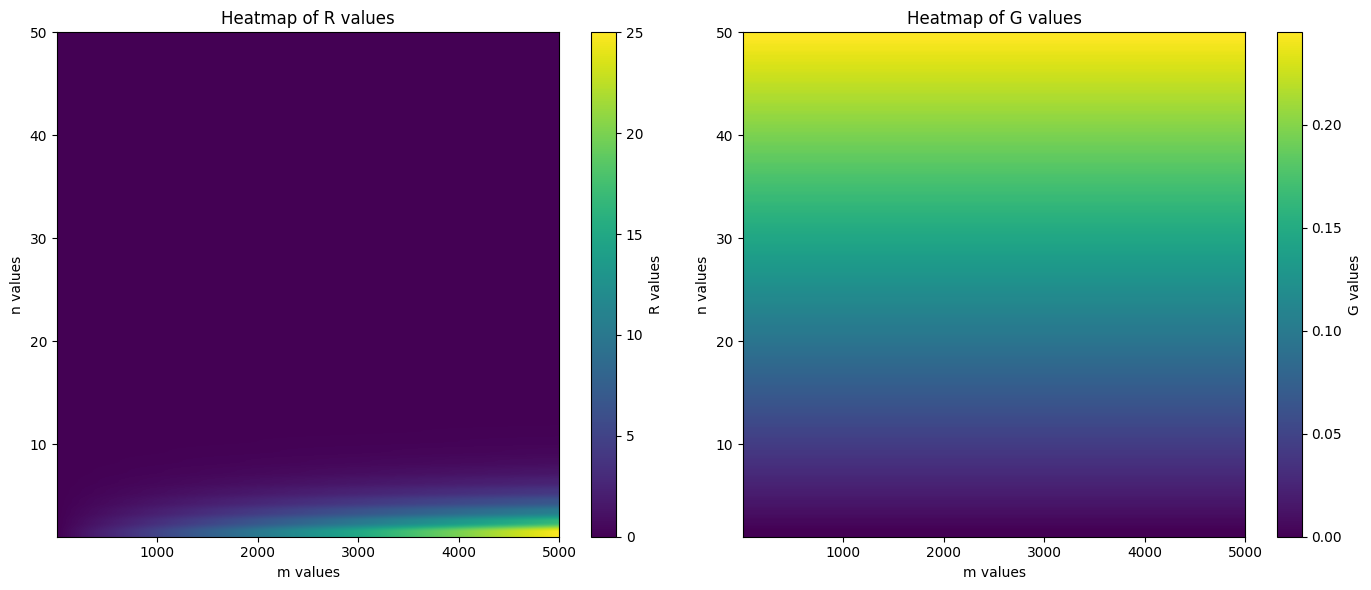

In [ ]:
# Define the ranges for n and m
n_values = np.arange(1, 51)  # n ranges from 1 to 50
m_values = np.arange(1, 5001)  # m ranges from 1 to 5000

# Define fixed parameters
p = 0.5  # Example probability value, can be adjusted
lambda_value = 0.005  # Example decay rate, can be adjusted

# Initialize arrays to store R and G values
R_values = np.zeros((len(n_values), len(m_values)))
G_values = np.zeros((len(n_values), len(m_values)))

# Compute R and G for each combination of n and m
for i, n in enumerate(n_values):
    for j, m in enumerate(m_values):
        R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
        G = lambda_value * (n - 1) / (1/p - 1)
        R_values[i, j] = R
        G_values[i, j] = G

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(R_values, extent=[m_values.min(), m_values.max(), n_values.min(), n_values.max()], aspect='auto', origin='lower')
plt.colorbar(label='R values')
plt.xlabel('m values')
plt.ylabel('n values')
plt.title('Heatmap of R values')

plt.subplot(1, 2, 2)
plt.imshow(G_values, extent=[m_values.min(), m_values.max(), n_values.min(), n_values.max()], aspect='auto', origin='lower')
plt.colorbar(label='G values')
plt.xlabel('m values')
plt.ylabel('n values')
plt.title('Heatmap of G values')

plt.tight_layout()
plt.show()


Version 2

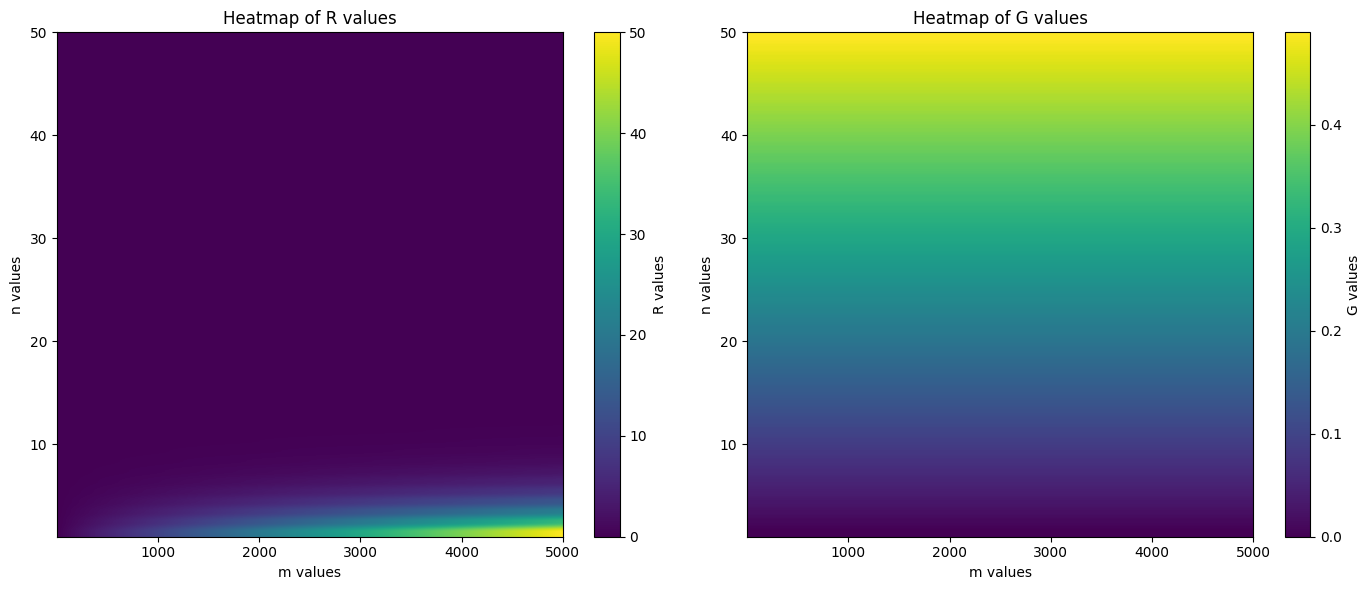

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for n and m
n_values = np.arange(1, 51)  # n ranges from 1 to 50
m_values = np.arange(1, 5001)  # m ranges from 1 to 5000

# Define fixed parameters
p = 0.5  # Example probability value, can be adjusted
lambda_value = 0.01  # Example decay rate, can be adjusted

# Initialize arrays to store R and G values
R_values = np.zeros((len(n_values), len(m_values)))
G_values = np.zeros((len(n_values), len(m_values)))

# Compute R and G for each combination of n and m
for i, n in enumerate(n_values):
    for j, m in enumerate(m_values):
        t0 = (1 - p) / (p * lambda_value)  # Correct formula for t0
        # Correct formula for R
        R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
        # Correct formula for G
        G = lambda_value * (n - 1) / (1/p - 1)
        R_values[i, j] = R
        G_values[i, j] = G

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(R_values, extent=[m_values.min(), m_values.max(), n_values.min(), n_values.max()], aspect='auto', origin='lower')
plt.colorbar(label='R values')
plt.xlabel('m values')
plt.ylabel('n values')
plt.title('Heatmap of R values')

plt.subplot(1, 2, 2)
plt.imshow(G_values, extent=[m_values.min(), m_values.max(), n_values.min(), n_values.max()], aspect='auto', origin='lower')
plt.colorbar(label='G values')
plt.xlabel('m values')
plt.ylabel('n values')
plt.title('Heatmap of G values')

plt.tight_layout()
plt.show()


To achieve R values in the range of 0.0005 to 0.005 and  G values in the range of 0.01 to 0.25, we need to experiment with the ranges of n, m, lamba, p. Let's fine-tune these parameters and find suitable ranges through systematic adjustments and calculations.

In [ ]:
! pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 8.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 12.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 11.9 MB/s eta 0:00:00


modify the above code to save the m, n, lamba, and p values for  appropriate R values in the desired range and  appropriate G values in the desired range.

Found 32866 appropriate R values in the desired range.
Found 170700 appropriate G values in the desired range.
Saved appropriate values to CSV files.


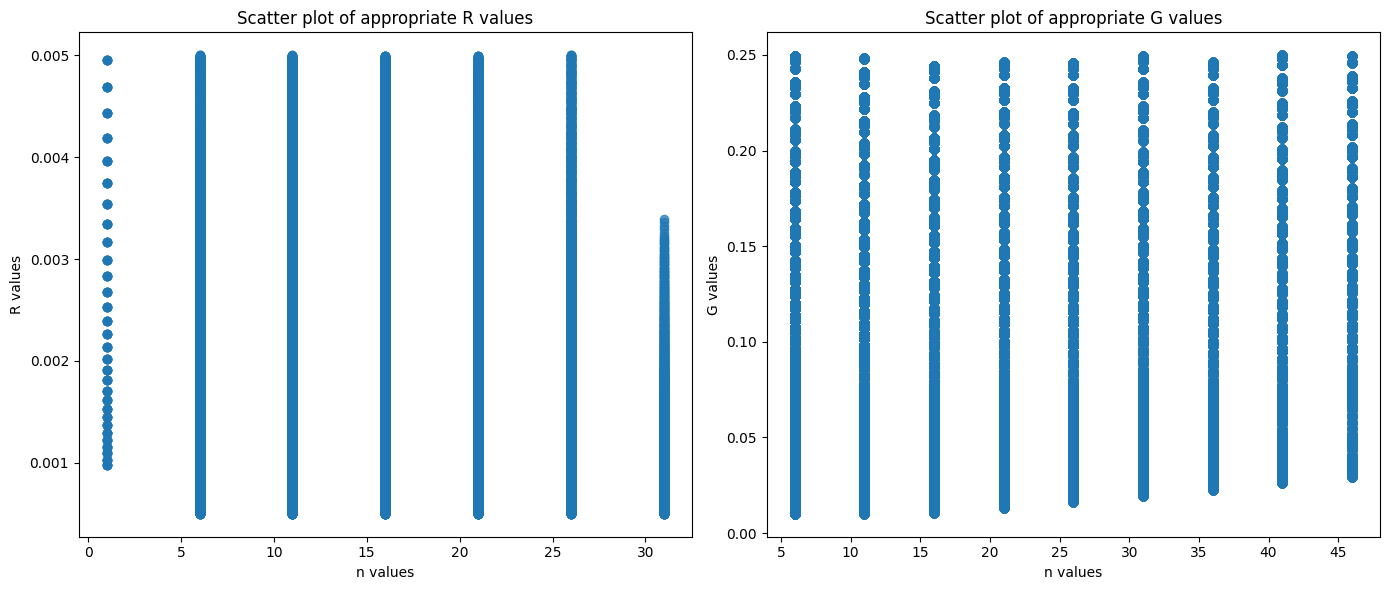

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define ranges for n and m to explore
n_values = np.arange(1, 51, 5)  # n ranges from 1 to 50
m_values = np.arange(1, 5001, 50)  # m ranges from 1 to 5000

# Parameters to be adjusted
p_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]  # Adjust p to find suitable values

# Define the range for the log2 scale (exponents)
log2_start = -10  # Corresponds to 2^(-10)
log2_end = -2  # Corresponds to 2^(-2)
num_values = 100  # Number of values to generate
# Generate the lambda values in a log2 scale
lambda_values = np.logspace(log2_start, log2_end, num_values, base=2.0)

# Initialize lists to store appropriate values
appropriate_R = []
appropriate_G = []

# Iterate through the parameter space
for p in p_values:
    for lambda_value in lambda_values:
        for n in n_values:
            for m in m_values:
                R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
                G = lambda_value * (n - 1) / (1/p - 1)
                if 0.0005 <= R <= 0.005:
                    appropriate_R.append((m, n, p, lambda_value, R))
                if 0.01 <= G <= 0.25:
                    appropriate_G.append((m, n, p, lambda_value, G))

# Convert lists to DataFrames
df_R = pd.DataFrame(appropriate_R, columns=['m', 'n', 'p', 'lambda', 'R'])
df_G = pd.DataFrame(appropriate_G, columns=['m', 'n', 'p', 'lambda', 'G'])

# Save DataFrames to CSV files
df_R.to_csv('appropriate_R_values.csv', index=False)
df_G.to_csv('appropriate_G_values.csv', index=False)

print(f"Found {len(appropriate_R)} appropriate R values in the desired range.")
print(f"Found {len(appropriate_G)} appropriate G values in the desired range.")
print("Saved appropriate values to CSV files.")

# Plotting some of the appropriate values to visualize
if appropriate_R:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(df_R['n'], df_R['R'], alpha=0.7)
    plt.xlabel('n values')
    plt.ylabel('R values')
    plt.title('Scatter plot of appropriate R values')

    plt.subplot(1, 2, 2)
    plt.scatter(df_G['n'], df_G['G'], alpha=0.7)
    plt.xlabel('n values')
    plt.ylabel('G values')
    plt.title('Scatter plot of appropriate G values')

    plt.tight_layout()
    plt.show()
else:
    print("No appropriate values found within the given parameter ranges.")


modify  to generate m, n, p 3 D plot for R values. likewise for G values.

Found 32866 appropriate R values in the desired range.
Found 170700 appropriate G values in the desired range.
Saved appropriate values to CSV files.


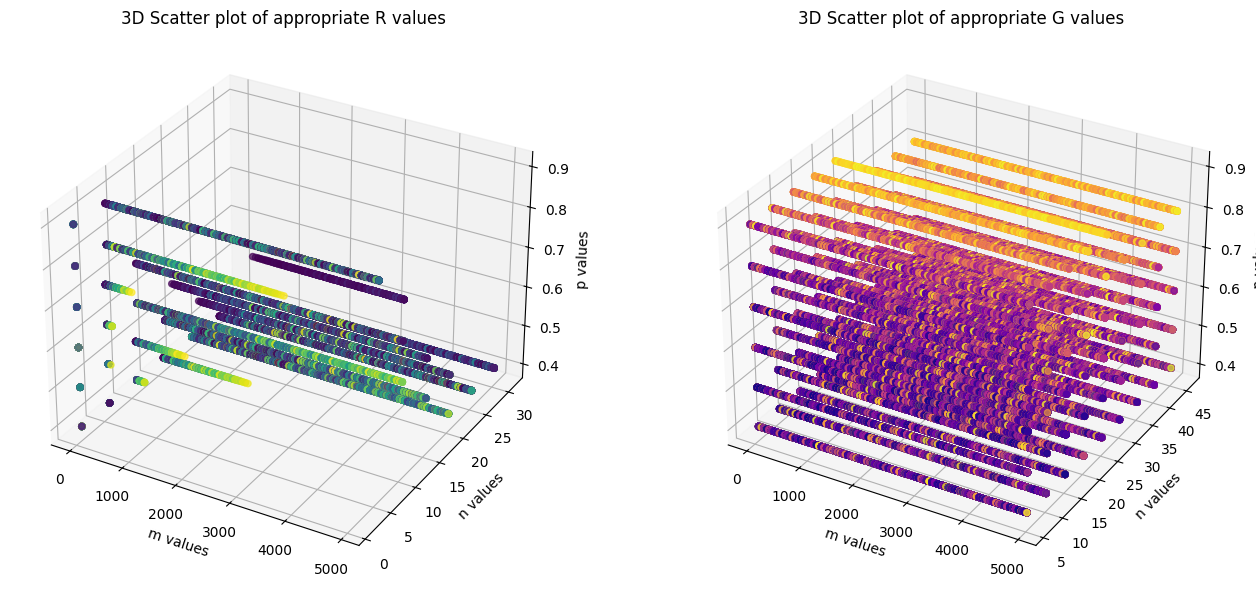

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define ranges for n and m to explore
n_values = np.arange(1, 51, 5)  # n ranges from 1 to 50
m_values = np.arange(1, 5001, 50)  # m ranges from 1 to 5000

# Parameters to be adjusted
p_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]  # Adjust p to find suitable values

# Define the range for the log2 scale (exponents)
log2_start = -10  # Corresponds to 2^(-10)
log2_end = -2  # Corresponds to 2^(-2)
num_values = 100  # Number of values to generate
# Generate the lambda values in a log2 scale
lambda_values = np.logspace(log2_start, log2_end, num_values, base=2.0)

# Initialize lists to store appropriate values
appropriate_R = []
appropriate_G = []

# Iterate through the parameter space
for p in p_values:
    for lambda_value in lambda_values:
        for n in n_values:
            for m in m_values:
                R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
                G = lambda_value * (n - 1) / (1/p - 1)
                if 0.0005 <= R <= 0.005:
                    appropriate_R.append((m, n, p, lambda_value, R))
                if 0.01 <= G <= 0.25:
                    appropriate_G.append((m, n, p, lambda_value, G))

# Convert lists to DataFrames
df_R = pd.DataFrame(appropriate_R, columns=['m', 'n', 'p', 'lambda', 'R'])
df_G = pd.DataFrame(appropriate_G, columns=['m', 'n', 'p', 'lambda', 'G'])

# Save DataFrames to CSV files
df_R.to_csv('appropriate_R_values.csv', index=False)
df_G.to_csv('appropriate_G_values.csv', index=False)

print(f"Found {len(appropriate_R)} appropriate R values in the desired range.")
print(f"Found {len(appropriate_G)} appropriate G values in the desired range.")
print("Saved appropriate values to CSV files.")

# Plotting 3D scatter plots for the appropriate values
if not df_R.empty:
    fig = plt.figure(figsize=(14, 6))

    # 3D scatter plot for R values
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(df_R['m'], df_R['n'], df_R['p'], c=df_R['R'], cmap='viridis', alpha=0.7)
    ax1.set_xlabel('m values')
    ax1.set_ylabel('n values')
    ax1.set_zlabel('p values')
    ax1.set_title('3D Scatter plot of appropriate R values')

    # 3D scatter plot for G values
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(df_G['m'], df_G['n'], df_G['p'], c=df_G['G'], cmap='plasma', alpha=0.7)
    ax2.set_xlabel('m values')
    ax2.set_ylabel('n values')
    ax2.set_zlabel('p values')
    ax2.set_title('3D Scatter plot of appropriate G values')

    plt.tight_layout()
    plt.show()
else:
    print("No appropriate values found within the given parameter ranges.")


revise the above code for 2D heatmap for R and G using all pairwise combination of m, n, and p.

Found 32866 appropriate R values in the desired range.
Found 170700 appropriate G values in the desired range.
Saved appropriate values to CSV files.


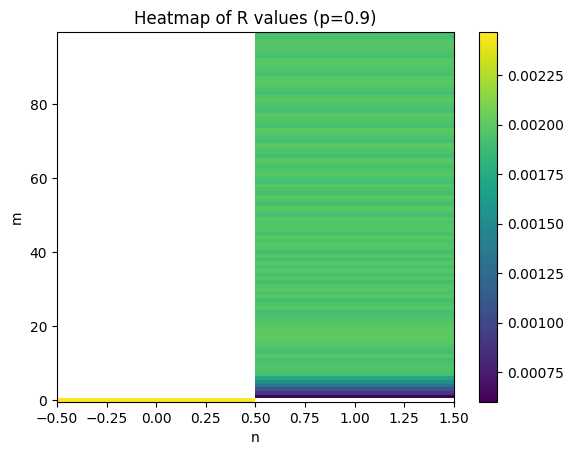

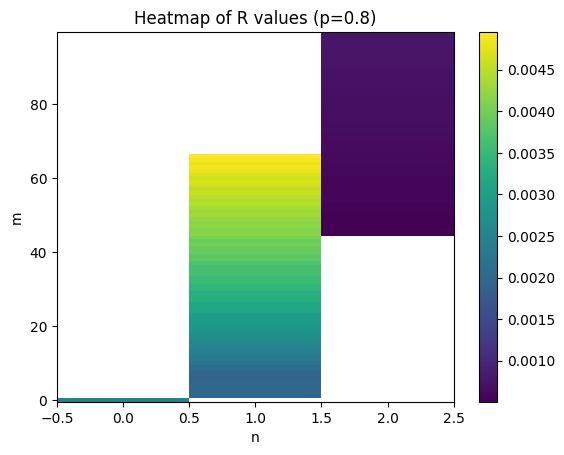

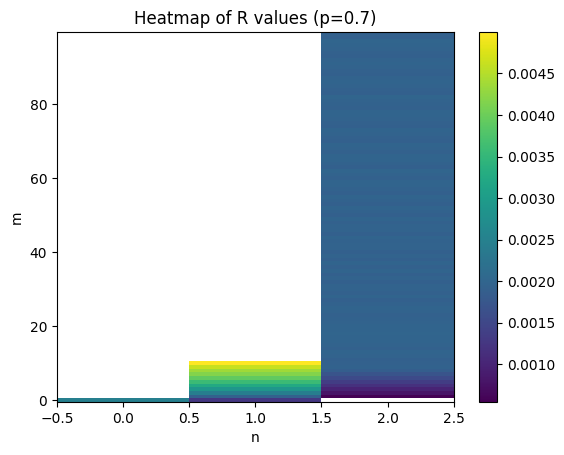

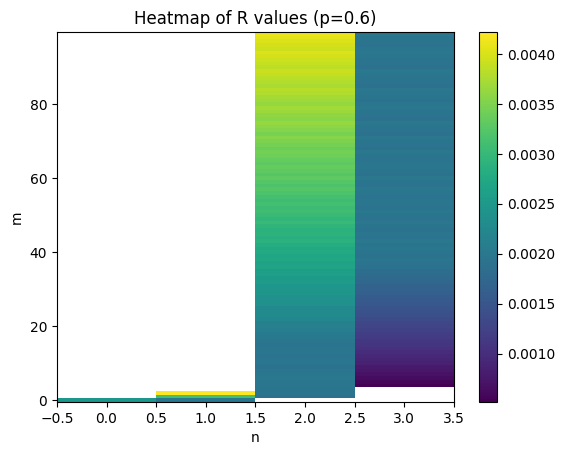

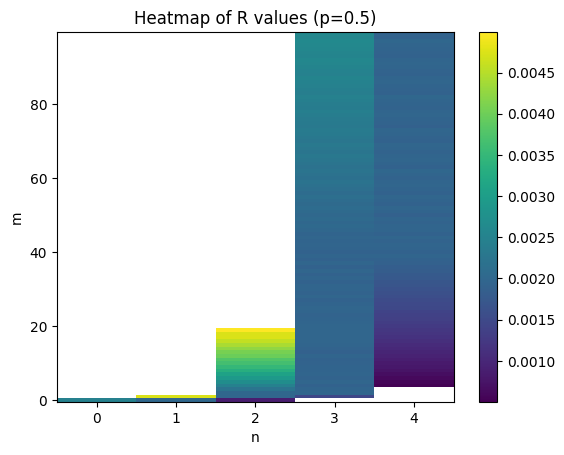

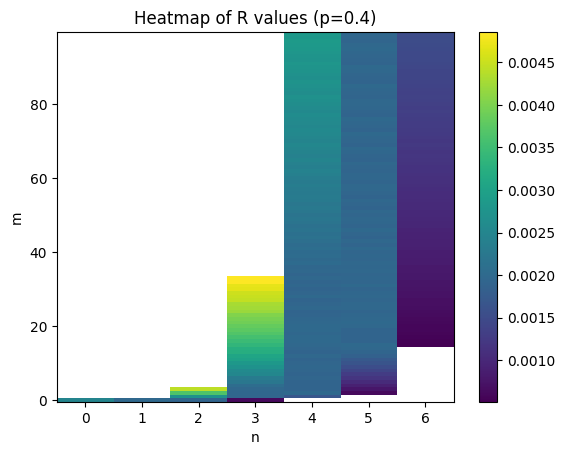

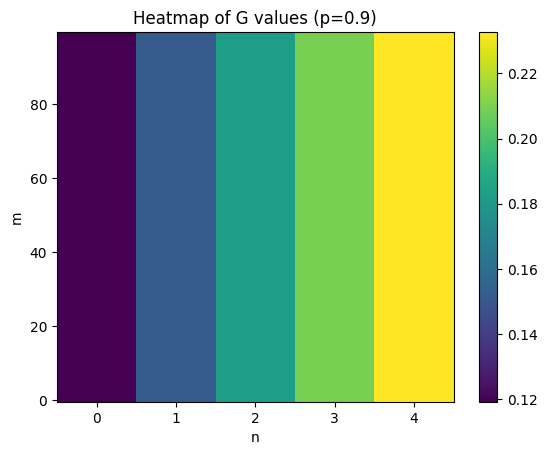

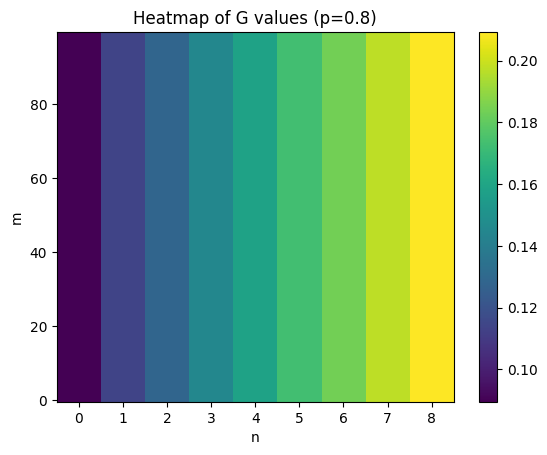

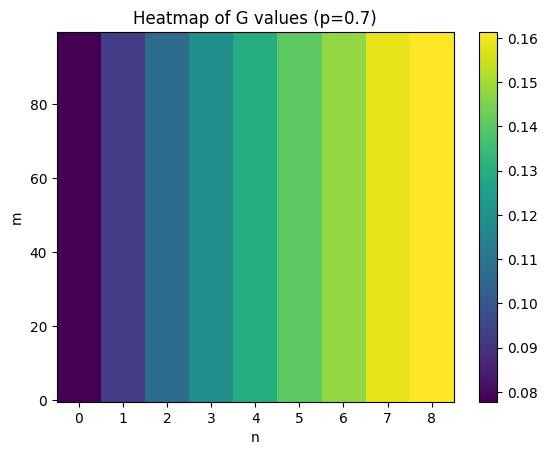

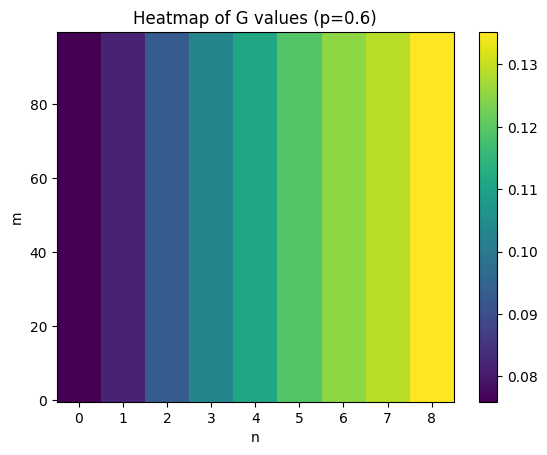

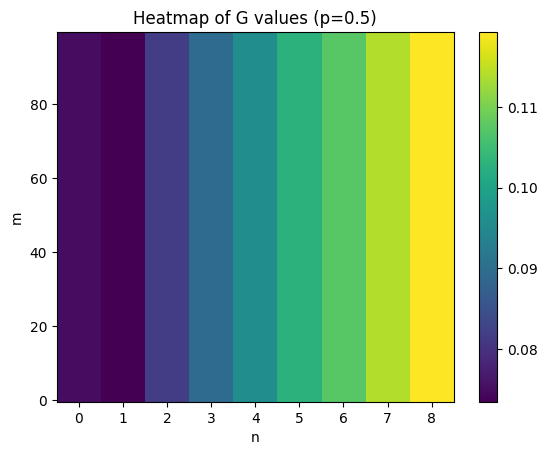

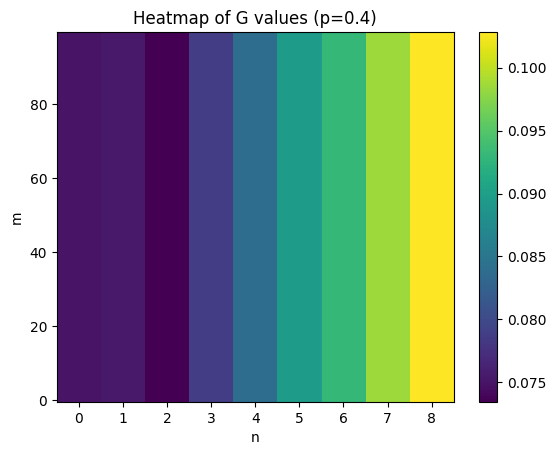

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define ranges for n and m to explore
n_values = np.arange(1, 51, 5)  # n ranges from 1 to 50
m_values = np.arange(1, 5001, 50)  # m ranges from 1 to 5000

# Parameters to be adjusted
p_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]  # Adjust p to find suitable values

# Define the range for the log2 scale (exponents)
log2_start = -10  # Corresponds to 2^(-10)
log2_end = -2  # Corresponds to 2^(-2)
num_values = 100  # Number of values to generate
# Generate the lambda values in a log2 scale
lambda_values = np.logspace(log2_start, log2_end, num_values, base=2.0)

# Initialize lists to store appropriate values
appropriate_R = []
appropriate_G = []

# Iterate through the parameter space
for p in p_values:
    for lambda_value in lambda_values:
        for n in n_values:
            for m in m_values:
                R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
                G = lambda_value * (n - 1) / (1/p - 1)
                if 0.0005 <= R <= 0.005:
                    appropriate_R.append((m, n, p, lambda_value, R))
                if 0.01 <= G <= 0.25:
                    appropriate_G.append((m, n, p, lambda_value, G))

# Convert lists to DataFrames
df_R = pd.DataFrame(appropriate_R, columns=['m', 'n', 'p', 'lambda', 'R'])
df_G = pd.DataFrame(appropriate_G, columns=['m', 'n', 'p', 'lambda', 'G'])

# Save DataFrames to CSV files
df_R.to_csv('appropriate_R_values.csv', index=False)
df_G.to_csv('appropriate_G_values.csv', index=False)

print(f"Found {len(appropriate_R)} appropriate R values in the desired range.")
print(f"Found {len(appropriate_G)} appropriate G values in the desired range.")
print("Saved appropriate values to CSV files.")

# Plotting 2D heatmaps for the appropriate values
def plot_heatmap(data, x_label, y_label, title):
    pivot_table = data.pivot_table(index=y_label, columns=x_label, values='value', aggfunc='mean')
    plt.imshow(pivot_table, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

if not df_R.empty:
    # Plot heatmap for R values
    for p in p_values:
        subset = df_R[df_R['p'] == p]
        if not subset.empty:
            plot_heatmap(subset.assign(value=subset['R']), 'n', 'm', f'Heatmap of R values (p={p})')

if not df_G.empty:
    # Plot heatmap for G values
    for p in p_values:
        subset = df_G[df_G['p'] == p]
        if not subset.empty:
            plot_heatmap(subset.assign(value=subset['G']), 'n', 'm', f'Heatmap of G values (p={p})')
else:
    print("No appropriate values found within the given parameter ranges.")


revise the following code for an 3D contour plot for a fix R=0.005 and G= 0.15

Found 594 appropriate R values within the desired range around R=0.005.
Found 10900 appropriate G values within the desired range around G=0.15.
Saved appropriate values to CSV files.


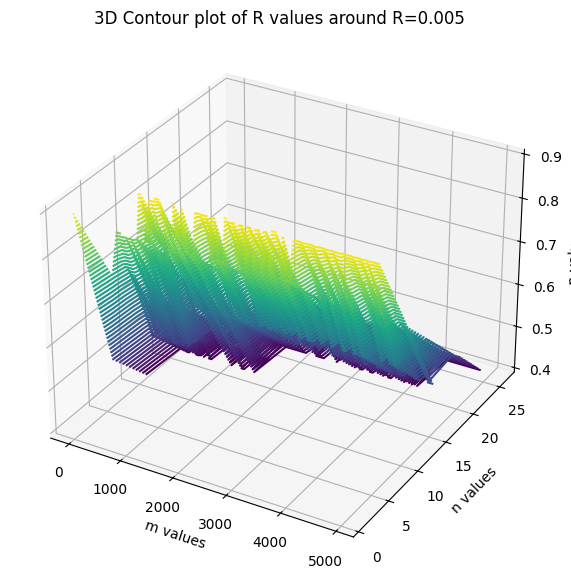

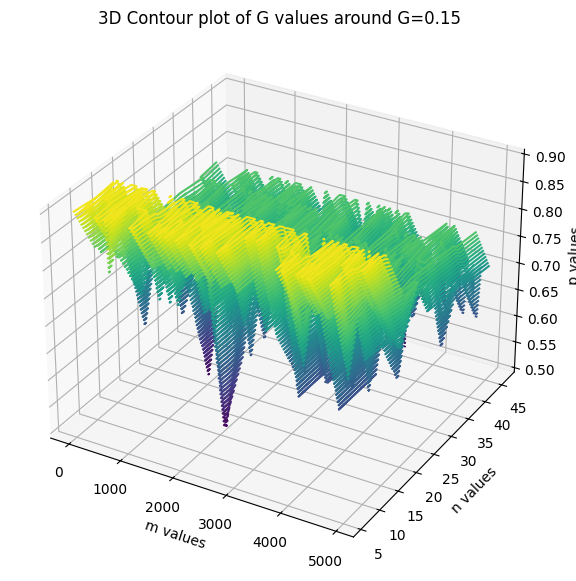

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib import cm

# Define ranges for n and m to explore
n_values = np.arange(1, 51, 5)  # n ranges from 1 to 50
m_values = np.arange(1, 5001, 50)  # m ranges from 1 to 5000

# Parameters to be adjusted
p_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]  # Adjust p to find suitable values

# Define the range for the log2 scale (exponents)
log2_start = -10  # Corresponds to 2^(-10)
log2_end = -2  # Corresponds to 2^(-2)
num_values = 100  # Number of values to generate
# Generate the lambda values in a log2 scale
lambda_values = np.logspace(log2_start, log2_end, num_values, base=2.0)

# Initialize lists to store appropriate values
appropriate_R = []
appropriate_G = []

# Tolerance values for R and G
tolerance_R = 0.0001
tolerance_G = 0.01

# Iterate through the parameter space
for p in p_values:
    for lambda_value in lambda_values:
        for n in n_values:
            for m in m_values:
                R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
                G = lambda_value * (n - 1) / (1/p - 1)
                if abs(R - 0.005) < tolerance_R:
                    appropriate_R.append((m, n, p, lambda_value, R))
                if abs(G - 0.15) < tolerance_G:
                    appropriate_G.append((m, n, p, lambda_value, G))

# Convert lists to DataFrames
df_R = pd.DataFrame(appropriate_R, columns=['m', 'n', 'p', 'lambda', 'R'])
df_G = pd.DataFrame(appropriate_G, columns=['m', 'n', 'p', 'lambda', 'G'])

# Save DataFrames to CSV files
df_R.to_csv('appropriate_R_values.csv', index=False)
df_G.to_csv('appropriate_G_values.csv', index=False)

print(f"Found {len(appropriate_R)} appropriate R values within the desired range around R=0.005.")
print(f"Found {len(appropriate_G)} appropriate G values within the desired range around G=0.15.")
print("Saved appropriate values to CSV files.")

# Plotting 3D contour plots for the appropriate values
def plot_3d_contour(df, value_col, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Extract m, n, p values
    X, Y, Z = df['m'], df['n'], df['p']
    values = df[value_col]

    # Create a grid and interpolate the values
    grid_x, grid_y = np.meshgrid(np.unique(X), np.unique(Y))
    grid_z = griddata((X, Y), Z, (grid_x, grid_y), method='linear')

    # Plot the contour
    ax.contour3D(grid_x, grid_y, grid_z, 50, cmap=cm.viridis)
    ax.set_xlabel('m values')
    ax.set_ylabel('n values')
    ax.set_zlabel('p values')
    ax.set_title(title)

    plt.show()

if not df_R.empty:
    plot_3d_contour(df_R, 'R', '3D Contour plot of R values around R=0.005')

if not df_G.empty:
    plot_3d_contour(df_G, 'G', '3D Contour plot of G values around G=0.15')
else:
    print("No appropriate values found within the given parameter ranges.")


Found 594 appropriate R values within the desired range around R=0.005.
Found 10900 appropriate G values within the desired range around G=0.15.
Saved appropriate values to CSV files.


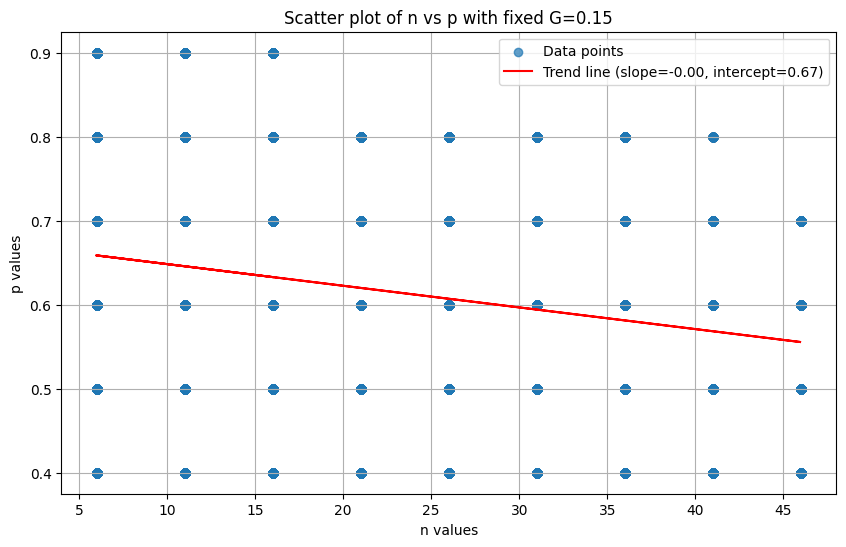

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.stats import linregress

# Define ranges for n and m to explore
n_values = np.arange(1, 51, 5)  # n ranges from 1 to 50
m_values = np.arange(1, 5001, 50)  # m ranges from 1 to 5000

# Parameters to be adjusted
p_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]  # Adjust p to find suitable values

# Define the range for the log2 scale (exponents)
log2_start = -10  # Corresponds to 2^(-10)
log2_end = -2  # Corresponds to 2^(-2)
num_values = 100  # Number of values to generate
# Generate the lambda values in a log2 scale
lambda_values = np.logspace(log2_start, log2_end, num_values, base=2.0)

# Initialize lists to store appropriate values
appropriate_R = []
appropriate_G = []

# Tolerance values for R and G
tolerance_R = 0.0001
tolerance_G = 0.01

# Iterate through the parameter space
for p in p_values:
    for lambda_value in lambda_values:
        for n in n_values:
            for m in m_values:
                R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
                G = lambda_value * (n - 1) / (1/p - 1)
                if abs(R - 0.005) < tolerance_R:
                    appropriate_R.append((m, n, p, lambda_value, R))
                if abs(G - 0.15) < tolerance_G:
                    appropriate_G.append((m, n, p, lambda_value, G))

# Convert lists to DataFrames
df_R = pd.DataFrame(appropriate_R, columns=['m', 'n', 'p', 'lambda', 'R'])
df_G = pd.DataFrame(appropriate_G, columns=['m', 'n', 'p', 'lambda', 'G'])

# Save DataFrames to CSV files
df_R.to_csv('appropriate_R_values.csv', index=False)
df_G.to_csv('appropriate_G_values.csv', index=False)

print(f"Found {len(appropriate_R)} appropriate R values within the desired range around R=0.005.")
print(f"Found {len(appropriate_G)} appropriate G values within the desired range around G=0.15.")
print("Saved appropriate values to CSV files.")

# Scatter plot between n and p when G is fixed, with a trend line
if not df_G.empty:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Extract n and p values for plotting
    n = df_G['n']
    p = df_G['p']

    # Scatter plot
    ax.scatter(n, p, alpha=0.7, label='Data points')

    # Linear regression for the trend line
    slope, intercept, r_value, p_value, std_err = linregress(n, p)
    trend_line = slope * n + intercept
    ax.plot(n, trend_line, color='red', label=f'Trend line (slope={slope:.2f}, intercept={intercept:.2f})')

    # Labels and title
    ax.set_xlabel('n values')
    ax.set_ylabel('p values')
    ax.set_title('Scatter plot of n vs p with fixed G=0.15')
    ax.legend()
    ax.grid(True)

    plt.show()
else:
    print("No appropriate values found within the given parameter ranges.")


Found 123 appropriate values within the desired range around G=0.15.
DataFrame of appropriate values:
        m   n         p  lambda         G
0    1000  23  0.400000    0.01  0.146667
1    1000  24  0.400000    0.01  0.153333
2    1000  22  0.405051    0.01  0.142971
3    1000  23  0.405051    0.01  0.149779
4    1000  24  0.405051    0.01  0.156587
..    ...  ..       ...     ...       ...
118  1000   4  0.829293    0.01  0.145740
119  1000   4  0.834343    0.01  0.151098
120  1000   4  0.839394    0.01  0.156792
121  1000   3  0.879798    0.01  0.146387
122  1000   3  0.884848    0.01  0.153684

[123 rows x 5 columns]


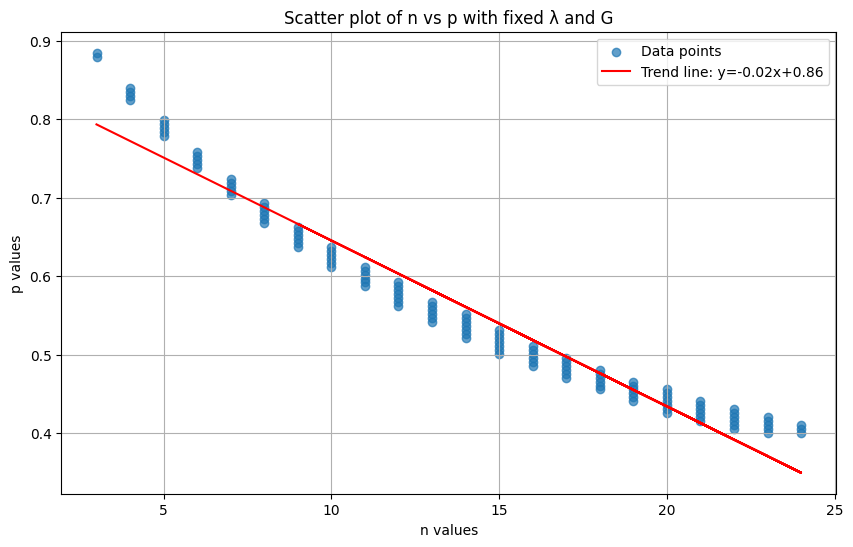

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define ranges for n and m to explore
n_values = np.arange(1, 51, 1)  # n ranges from 1 to 50
m_values = [1000]  # Fixed value for m

# Expand p_values to 100 values
p_values = np.linspace(0.4, 0.9, 100)  # Generating 100 values between 0.4 and 0.9

# Fixed values for lambda and G
fixed_lambda = 0.01  # Example fixed value for lambda
fixed_G = 0.15  # Example fixed value for G

# Initialize lists to store appropriate values
appropriate_values = []

# Iterate through the parameter space
for p in p_values:
    for n in n_values:
        for m in m_values:
            lambda_value = fixed_lambda
            G = lambda_value * (n - 1) / (1/p - 1)
            if abs(G - fixed_G) < 0.01:  # Using a tolerance for G
                appropriate_values.append((m, n, p, lambda_value, G))

# Convert list to DataFrame
df = pd.DataFrame(appropriate_values, columns=['m', 'n', 'p', 'lambda', 'G'])

print(f"Found {len(appropriate_values)} appropriate values within the desired range around G={fixed_G}.")
print("DataFrame of appropriate values:")
print(df)

# Scatter plot between n and p with trend line
if not df.empty:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['n'], df['p'], label='Data points', alpha=0.7)

    # Fit a linear trend line
    slope, intercept, r_value, p_value, std_err = linregress(df['n'], df['p'])
    trend_line = slope * df['n'] + intercept
    plt.plot(df['n'], trend_line, color='red', label=f'Trend line: y={slope:.2f}x+{intercept:.2f}')

    plt.xlabel('n values')
    plt.ylabel('p values')
    plt.title('Scatter plot of n vs p with fixed λ and G')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No appropriate values found within the given parameter ranges.")


# Changing p lead to logR - G plot

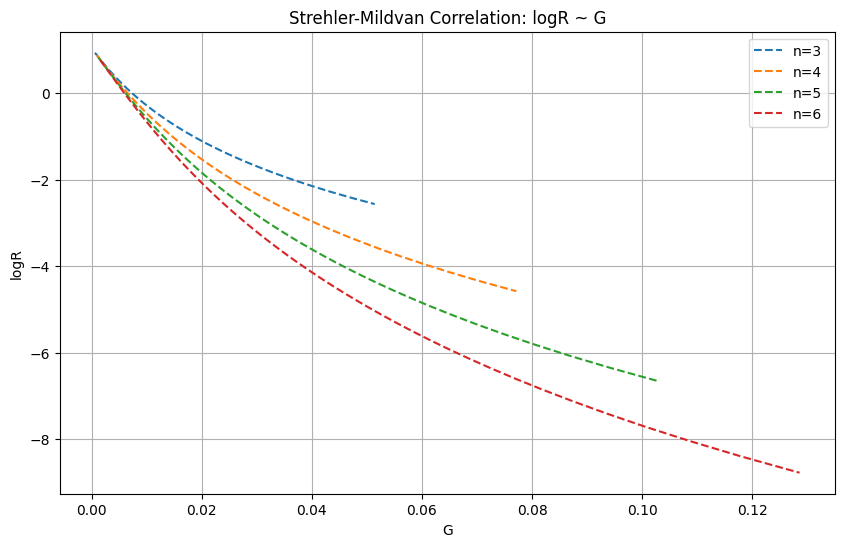

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
lambda_value = 1 / 350
m_value = 1000
n_values = [3, 4, 5, 6]
p_values = np.linspace(0.1, 0.9, 100)  # Generating 100 values for p between 0.1 and 0.9

# Function to calculate R and G
def calculate_R_G(m, n, p, lambda_value):
    R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
    G = lambda_value * (n - 1) / (1 / p - 1)
    return R, G

# Plotting
plt.figure(figsize=(10, 6))

for n in n_values:
    logR_values = []
    G_values = []
    for p in p_values:
        R, G = calculate_R_G(m_value, n, p, lambda_value)
        logR_values.append(np.log(R))
        G_values.append(G)

    plt.plot(G_values, logR_values, linestyle='--', label=f'n={n}')

# Customize the plot
plt.xlabel('G')
plt.ylabel('logR')
plt.title('Strehler-Mildvan Correlation: logR ~ G')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-2-d40e30311ef0>:13: RuntimeWarning: divide by zero encountered in scalar divide
  G = lambda_value * (n - 1) / (1 / p - 1)


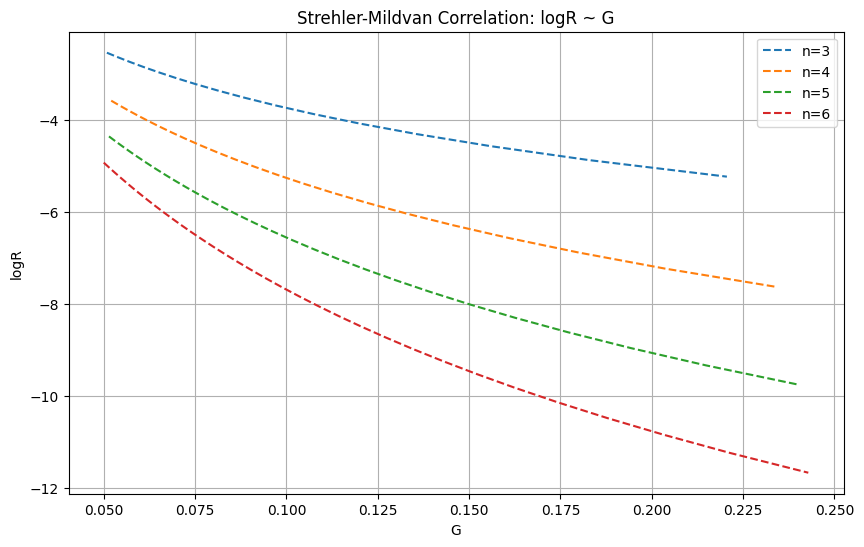

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
lambda_value = 1 / 350
m_value = 1000
n_values = [3, 4, 5, 6]
p_values = np.linspace(0.5, 1, 100)  # Generating 100 values for p between 0.5 and 1

# Function to calculate R and G
def calculate_R_G(m, n, p, lambda_value):
    R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
    G = lambda_value * (n - 1) / (1 / p - 1)
    return R, G

# Plotting
plt.figure(figsize=(10, 6))

for n in n_values:
    logR_values = []
    G_values = []
    for p in p_values:
        R, G = calculate_R_G(m_value, n, p, lambda_value)
        if 0.05 <= G <= 0.25:  # Filter to ensure G falls within the desired range
            logR_values.append(np.log(R))
            G_values.append(G)

    plt.plot(G_values, logR_values, linestyle='--', label=f'n={n}')

# Customize the plot
plt.xlabel('G')
plt.ylabel('logR')
plt.title('Strehler-Mildvan Correlation: logR ~ G')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-6-8c2938d63e7a>:13: RuntimeWarning: divide by zero encountered in scalar divide
  G = lambda_value * (n - 1) / (1 / p - 1)


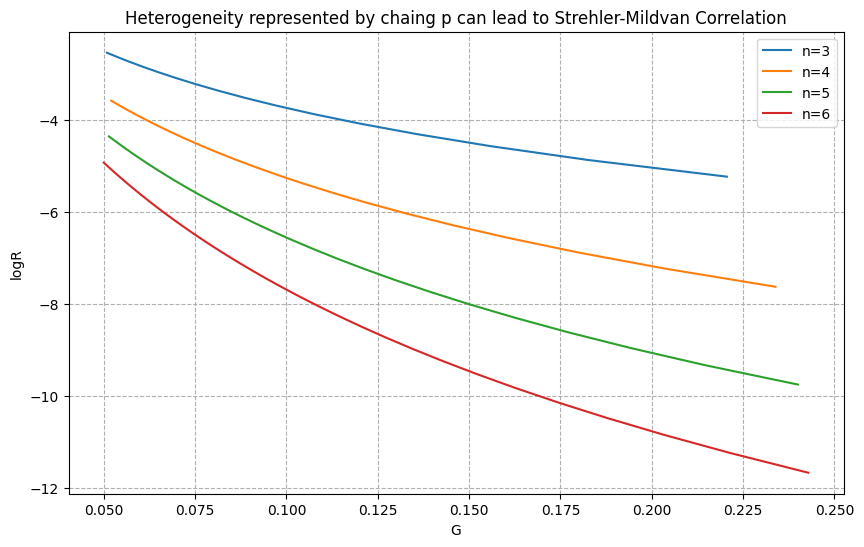

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
lambda_value = 1 / 350
m_value = 1000
n_values = [3, 4, 5, 6]
p_values = np.linspace(0.5, 1, 100)  # Generating 100 values for p between 0.5 and 1

# Function to calculate R and G
def calculate_R_G(m, n, p, lambda_value):
    R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
    G = lambda_value * (n - 1) / (1 / p - 1)
    return R, G

# Plotting
plt.figure(figsize=(10, 6))

for n in n_values:
    logR_values = []
    G_values = []
    for p in p_values:
        R, G = calculate_R_G(m_value, n, p, lambda_value)
        if 0.05 <= G <= 0.25:  # Filter to ensure G falls within the desired range
            logR_values.append(np.log(R))
            G_values.append(G)

    plt.plot(G_values, logR_values, label=f'n={n}', linestyle='-')  # Solid lines

# Customize the plot
plt.xlabel('G')
plt.ylabel('logR')
plt.title('Heterogeneity represented by chaing p can lead to Strehler-Mildvan Correlation')
plt.legend()

# Customize the grid lines
plt.grid(True, which='both', linestyle='--')  # Dashed grid lines

plt.show()


# fixed t0.5=25 S_net plots

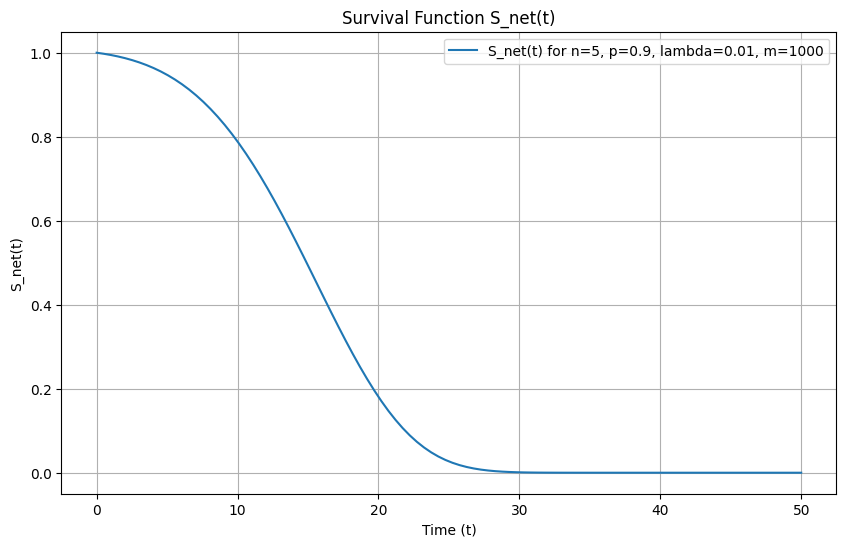

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 5
p = 0.9
lambda_value = 0.01
m = 1000
t_values = np.linspace(0, 50, 100)  # Time values from 0 to 100

# Calculate t0
t0 = (1 - p) / (p * lambda_value)

# Calculate R
R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)

# Calculate S_net(t) for each t
S_net = np.exp((R * t0 / n) * (1 - (1 + t_values / t0) ** n))

# Plotting the survival function
plt.figure(figsize=(10, 6))
plt.plot(t_values, S_net, label=f'S_net(t) for n={n}, p={p}, lambda={lambda_value}, m={m}')
plt.xlabel('Time (t)')
plt.ylabel('S_net(t)')
plt.title('Survival Function S_net(t)')
plt.legend()
plt.grid(True)
plt.show()


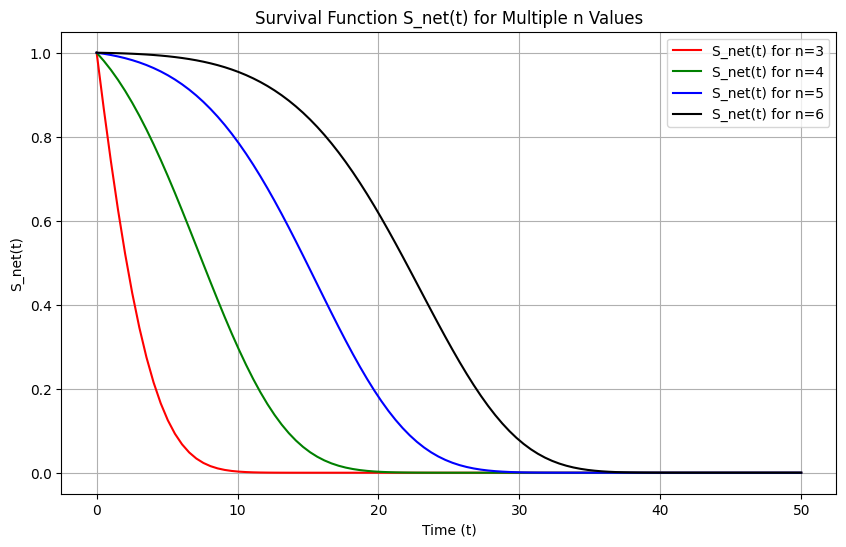

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
p = 0.9
lambda_value = 0.01
m = 1000
t_values = np.linspace(0, 50, 100)  # Time values from 0 to 100
n_values = [3, 4, 5, 6]
colors = ['red', 'green', 'blue', 'black']

plt.figure(figsize=(10, 6))

for n, color in zip(n_values, colors):
    # Calculate t0
    t0 = (1 - p) / (p * lambda_value)

    # Calculate R
    R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)

    # Calculate S_net(t) for each t
    S_net = np.exp((R * t0 / n) * (1 - (1 + t_values / t0) ** n))

    # Plotting the survival function
    plt.plot(t_values, S_net, label=f'S_net(t) for n={n}', color=color)

plt.xlabel('Time (t)')
plt.ylabel('S_net(t)')
plt.title('Survival Function S_net(t) for Multiple n Values')
plt.legend()
plt.grid(True)
plt.show()


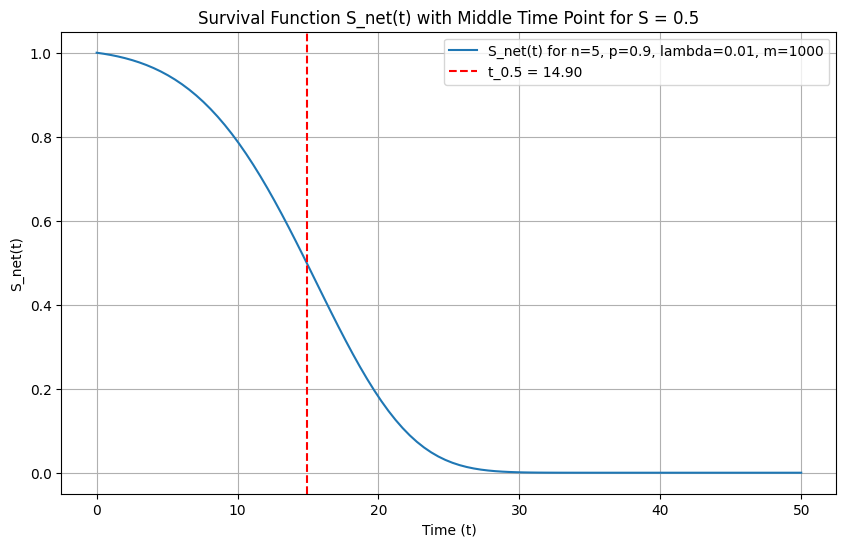

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 5
p = 0.9
lambda_value = 0.01
m = 1000
t_values = np.linspace(0, 50, 100)  # Time values from 0 to 100

# Calculate t0
t0 = (1 - p) / (p * lambda_value)

# Calculate R
R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)

# Calculate t_0.5
t_0_5 = t0 * (np.power(1 - (n * np.log(0.5)) / (R * t0), 1 / n) - 1)

# Calculate S_net(t) for each t
S_net = np.exp((R * t0 / n) * (1 - (1 + t_values / t0) ** n))

# Plotting the survival function
plt.figure(figsize=(10, 6))
plt.plot(t_values, S_net, label=f'S_net(t) for n={n}, p={p}, lambda={lambda_value}, m={m}')
plt.axvline(x=t_0_5, color='r', linestyle='--', label=f't_0.5 = {t_0_5:.2f}')
plt.xlabel('Time (t)')
plt.ylabel('S_net(t)')
plt.title('Survival Function S_net(t) with Middle Time Point for S = 0.5')
plt.legend()
plt.grid(True)
plt.show()


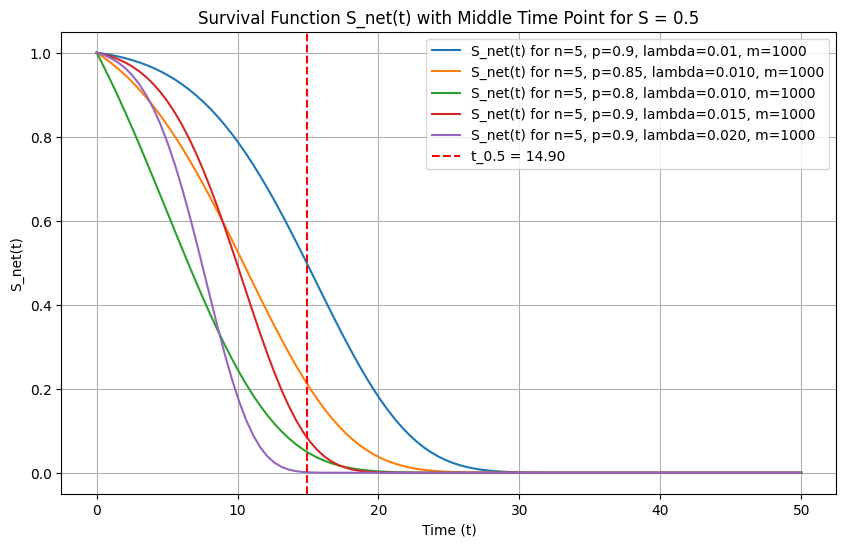

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate t0, R, and S_net
def calculate_survival_curve(n, p, lambda_value, m, t_values):
    t0 = (1 - p) / (p * lambda_value)
    R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
    S_net = np.exp((R * t0 / n) * (1 - (1 + t_values / t0) ** n))
    return t0, R, S_net

# Initial parameters
n = 5
p = 0.9
lambda_value = 0.01
m = 1000
t_values = np.linspace(0, 50, 100)  # Time values from 0 to 50

# Calculate initial t0, R, and S_net
t0, R, S_net_initial = calculate_survival_curve(n, p, lambda_value, m, t_values)

# Calculate t_0.5 for the initial parameters
t_0_5 = t0 * (np.power(1 - (n * np.log(0.5)) / (R * t0), 1 / n) - 1)

# Parameters for additional curves to match t_0.5
p_values = [0.85, 0.8]
lambda_values = [0.015, 0.02]

# Calculate survival curves for additional parameters
survival_curves = [(p, lambda_value) for p in p_values] + [(p, lmb) for lmb in lambda_values]
curves = [calculate_survival_curve(n, p, lambda_value if p in p_values else lmb, m, t_values) for p, lmb in survival_curves]

# Plotting the survival functions
plt.figure(figsize=(10, 6))

# Plot initial survival curve
plt.plot(t_values, S_net_initial, label=f'S_net(t) for n={n}, p={p}, lambda={lambda_value}, m={m}')

# Plot additional survival curves
for (p, lmb), (t0, R, S_net) in zip(survival_curves, curves):
    plt.plot(t_values, S_net, label=f'S_net(t) for n={n}, p={p}, lambda={lmb:.3f}, m={m}')

plt.axvline(x=t_0_5, color='r', linestyle='--', label=f't_0.5 = {t_0_5:.2f}')
plt.xlabel('Time (t)')
plt.ylabel('S_net(t)')
plt.title('Survival Function S_net(t) with Middle Time Point for S = 0.5')
plt.legend()
plt.grid(True)
plt.show()


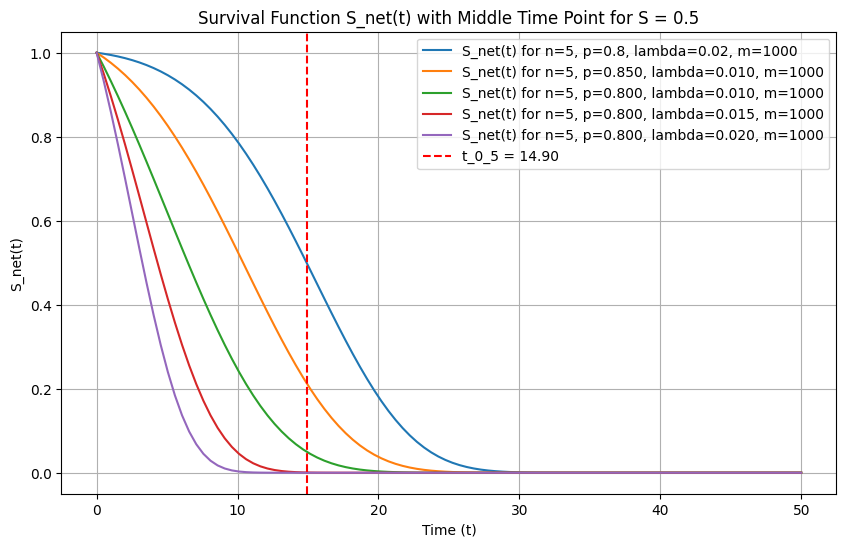

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate t0, R, and S_net
def calculate_survival_curve(n, p, lambda_value, m, t_values):
    t0 = (1 - p) / (p * lambda_value)
    R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
    S_net = np.exp((R * t0 / n) * (1 - (1 + t_values / t0) ** n))
    return t0, R, S_net

# Function to calculate adjusted p or lambda for the same t_0_5
def calculate_adjusted_parameters(n, t_0_5, initial_t0, initial_R, initial_p, initial_lambda):
    # Calculate adjusted p to achieve the same t_0_5
    adjusted_p = initial_p
    adjusted_lambda = initial_lambda
    target_t0_5 = initial_t0 * (np.power(1 - (n * np.log(0.5)) / (initial_R * initial_t0), 1 / n) - 1)
    if target_t0_5 != t_0_5:
        adjusted_p = 1 - (1 - initial_p) * np.exp((initial_R / initial_lambda) * (1 / initial_p - 1) * (initial_t0 - t_0_5) / initial_t0)
        adjusted_lambda = initial_lambda
        t0 = (1 - adjusted_p) / (adjusted_p * adjusted_lambda)
        adjusted_R = m * n * adjusted_p * adjusted_lambda * ((1 - adjusted_p) ** (n - 1)) / (1 - (1 - adjusted_p) ** n)
    else:
        t0 = initial_t0
        adjusted_R = initial_R

    return adjusted_p, adjusted_lambda, t0, adjusted_R

# Initial parameters
n = 5
p = 0.9
lambda_value = 0.01
m = 1000
t_values = np.linspace(0, 50, 100)  # Time values from 0 to 50

# Calculate initial t0, R, and S_net
initial_t0, initial_R, S_net_initial = calculate_survival_curve(n, p, lambda_value, m, t_values)

# Calculate t_0_5 for the initial parameters
t_0_5 = initial_t0 * (np.power(1 - (n * np.log(0.5)) / (initial_R * initial_t0), 1 / n) - 1)

# Parameters for additional curves to match t_0_5
additional_p_values = [0.85, 0.8]
additional_lambda_values = [0.015, 0.02]

# Calculate survival curves for additional parameters
additional_curves = []
for p in additional_p_values:
    adjusted_p, adjusted_lambda, t0, R = calculate_adjusted_parameters(n, t_0_5, initial_t0, initial_R, p, lambda_value)
    _, _, S_net = calculate_survival_curve(n, adjusted_p, adjusted_lambda, m, t_values)
    additional_curves.append((adjusted_p, adjusted_lambda, S_net))

for lambda_value in additional_lambda_values:
    adjusted_p, adjusted_lambda, t0, R = calculate_adjusted_parameters(n, t_0_5, initial_t0, initial_R, p, lambda_value)
    _, _, S_net = calculate_survival_curve(n, adjusted_p, adjusted_lambda, m, t_values)
    additional_curves.append((adjusted_p, adjusted_lambda, S_net))

# Plotting the survival functions
plt.figure(figsize=(10, 6))

# Plot initial survival curve
plt.plot(t_values, S_net_initial, label=f'S_net(t) for n={n}, p={p}, lambda={lambda_value}, m={m}')

# Plot additional survival curves
for (adjusted_p, adjusted_lambda, S_net) in additional_curves:
    plt.plot(t_values, S_net, label=f'S_net(t) for n={n}, p={adjusted_p:.3f}, lambda={adjusted_lambda:.3f}, m={m}')

plt.axvline(x=t_0_5, color='r', linestyle='--', label=f't_0_5 = {t_0_5:.2f}')
plt.xlabel('Time (t)')
plt.ylabel('S_net(t)')
plt.title('Survival Function S_net(t) with Middle Time Point for S = 0.5')
plt.legend()
plt.grid(True)
plt.show()


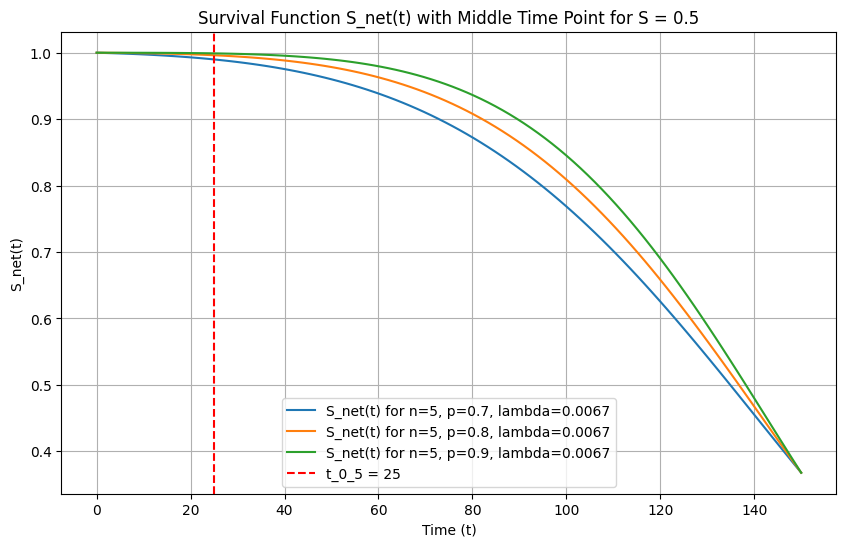

For p=0.7: t0 = 64.28571428571429, R = 0.831474893894429, G = 0.062222222222222213
For p=0.8: t0 = 37.499999999999986, R = 0.2922185372589635, G = 0.1066666666666667
For p=0.9: t0 = 16.666666666666664, R = 0.03585630419967386, G = 0.24000000000000005


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
t_0_5 = 25
n = 5
lambda_value = 1 / 150
p_values = [0.7, 0.8, 0.9]
t_values = np.linspace(0, 150, 100)  # Time values from 0 to 50

# Function to calculate t0, R, and S_net
def calculate_survival_curve(n, p, lambda_value, t_values):
    t0 = (1 - p) / (p * lambda_value)
    R = n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
    S_net = np.exp((R * t0 / n) * (1 - (1 + t_values / t0) ** n))
    return t0, R, S_net

# Function to calculate p, R, G
def calculate_parameters(t_0_5, n, lambda_value, p):
    t0 = (1 - p) / (p * lambda_value)
    R = (n * np.log(0.5)) / (1 - (1 + t_0_5 / t0) ** n)
    G = (n - 1) / t0
    return t0, R, G

# Plotting the survival functions
plt.figure(figsize=(10, 6))

# Iterate over p values
for p in p_values:
    t0, R, S_net = calculate_survival_curve(n, p, lambda_value, t_values)
    plt.plot(t_values, S_net, label=f'S_net(t) for n={n}, p={p}, lambda={lambda_value:.4f}')

# Plot the vertical line at t_0.5
plt.axvline(x=t_0_5, color='r', linestyle='--', label=f't_0_5 = {t_0_5}')

plt.xlabel('Time (t)')
plt.ylabel('S_net(t)')
plt.title('Survival Function S_net(t) with Middle Time Point for S = 0.5')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the parameters for each p value
for p in p_values:
    t0, R, G = calculate_parameters(t_0_5, n, lambda_value, p)
    print(f"For p={p}: t0 = {t0}, R = {R}, G = {G}")


In [22]:
import numpy as np

# Function to calculate t0, p, R, G
def calculate_parameters(t_0_5, n, lambda_value):
    def compute_p(t0):
        return 1 / (1 + t0 / 350)

    t0_initial = t_0_5  # Initial guess for t0
    for _ in range(100):  # Iterative approach
        p = compute_p(t0_initial)
        t0 = 350 * (1 - p) / p
        if np.abs(t0 - t0_initial) < 1e-6:  # Check for convergence
            break
        t0_initial = t0

    # Calculate R
    R = (n * np.log(0.5)) / (1 - (1 + t_0_5 / t0) ** n)

    # Calculate G
    G = (n - 1) / t0

    return p, R, G

# Define the parameters for the combinations
combinations = [(5, 25, 1/150), (10, 25, 1/150), (15, 25, 1/150)]

# Calculate parameters for each combination
results = []
for n, t_0_5, lambda_value in combinations:
    p, R, G = calculate_parameters(t_0_5, n, lambda_value)
    results.append((n, p, R, G))

# Print the results
for i, (n, p, R, G) in enumerate(results):
    print(f"Combination {i+1}:")
    print(f"  n = {n}, p = {p:.6f}, R = {R:.6f}, G = {G:.6f}")


Combination 1:
  n = 5, p = 0.933333, R = 0.111798, G = 0.160000
Combination 2:
  n = 10, p = 0.933333, R = 0.006776, G = 0.360000
Combination 3:
  n = 15, p = 0.933333, R = 0.000317, G = 0.560000


Combination 1:
  n = 5, p = 0.857143, R = 0.111798, G = 0.160000
Combination 2:
  n = 10, p = 0.857143, R = 0.006776, G = 0.360000
Combination 3:
  n = 15, p = 0.857143, R = 0.000317, G = 0.560000


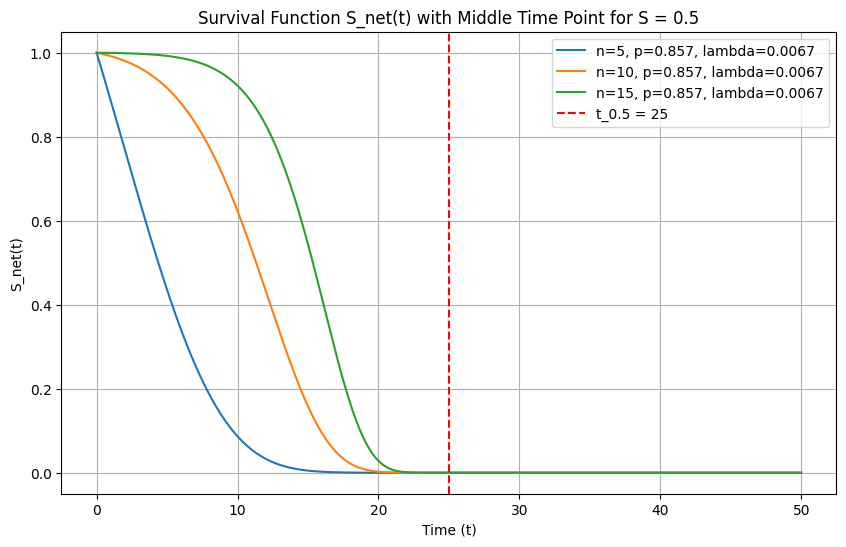

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate t0, p, R, G
def calculate_parameters(t_0_5, n, lambda_value):
    def compute_p(t0):
        return 1 / (1 + t0 / 150)

    # Initial guess for t0
    t0_initial = t_0_5
    for _ in range(100):  # Iterative approach
        p = compute_p(t0_initial)
        t0 = 150 * (1 - p) / p
        if np.abs(t0 - t0_initial) < 1e-6:  # Check for convergence
            break
        t0_initial = t0

    # Calculate R
    R = (n * np.log(0.5)) / (1 - (1 + t_0_5 / t0) ** n)

    # Calculate G
    G = (n - 1) / t0

    return p, R, G, t0

# Function to calculate the survival function S_net(t)
def survival_function(t, R, t0, n):
    return np.exp((R * t0 / n) * (1 - (1 + t / t0) ** n))

# Define the parameters for the combinations
combinations = [(5, 25, 1/150), (10, 25, 1/150), (15, 25, 1/150)]
t_values = np.linspace(0, 50, 500)  # Time values from 0 to 50

# Calculate parameters and plot survival function for each combination
plt.figure(figsize=(10, 6))

for i, (n, t_0_5, lambda_value) in enumerate(combinations):
    p, R, G, t0 = calculate_parameters(t_0_5, n, lambda_value)
    S_net = survival_function(t_values, R, t0, n)
    plt.plot(t_values, S_net, label=f'n={n}, p={p:.3f}, lambda={lambda_value:.4f}')
    print(f"Combination {i+1}:")
    print(f"  n = {n}, p = {p:.6f}, R = {R:.6f}, G = {G:.6f}")

# Plot formatting
plt.axvline(x=25, color='r', linestyle='--', label='t_0.5 = 25')
plt.xlabel('Time (t)')
plt.ylabel('S_net(t)')
plt.title('Survival Function S_net(t) with Middle Time Point for S = 0.5')
plt.legend()
plt.grid(True)
plt.show()


G = 0.1, R = 0.006198502614852657
G = 0.2, R = 0.0009404142544392835
G = 0.3, R = 0.00011507430733471564


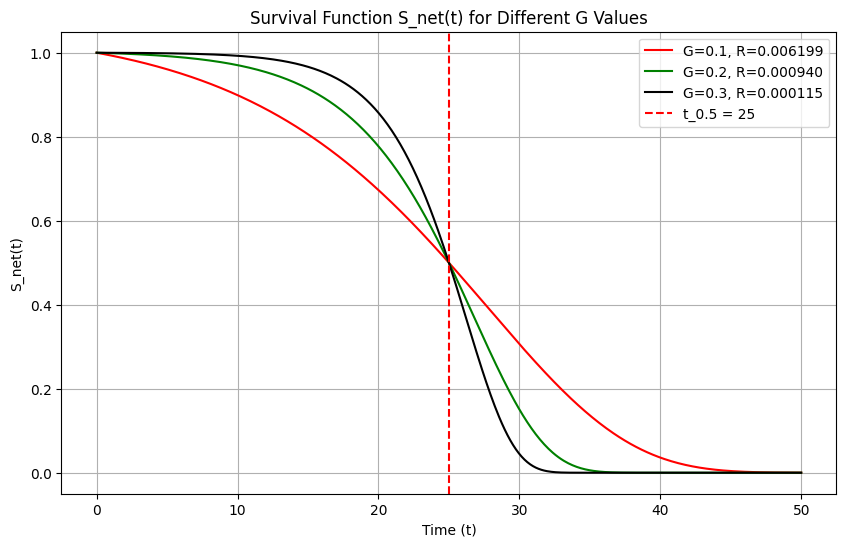

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Function to calculate R given G and t0.5
def calculate_R(G, t0_5):
    return (np.log(2) * G) / (np.exp(G * t0_5) - 1)

# Function to calculate the survival function S_net(t)
def survival_function(t, R, G):
    return np.exp((R / G) * (1 - np.exp(G * t)))

# Given values
t0_5 = 25
G_values = [0.1, 0.2, 0.3]
t_values = np.linspace(0, 50, 500)  # Time values from 0 to 50

# Calculate R for each G and compute the survival function
colors = ['red', 'green', 'black']
plt.figure(figsize=(10, 6))

for G, color in zip(G_values, colors):
    R = calculate_R(G, t0_5)
    S_net = survival_function(t_values, R, G)
    plt.plot(t_values, S_net, label=f'G={G}, R={R:.6f}', color=color)
    print(f"G = {G}, R = {R}")

# Plot formatting
plt.axvline(x=t0_5, color='r', linestyle='--', label='t_0.5 = 25')
plt.xlabel('Time (t)')
plt.ylabel('S_net(t)')
plt.title('Survival Function S_net(t) for Different G Values')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
import numpy as np

# Function to calculate R for the network model
def calculate_R_network(n, p, lambda_value, m):
    return m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)

# Function to calculate R for the Gompertz model
def calculate_R_gompertz(G, t0_5):
    return (np.log(2) * G) / (np.exp(G * t0_5) - 1)

# Given values
t0_5 = 25
m = 1  # Assuming m=1 for simplicity

# Combinations for G=0.1
combinations_0_1 = [(5, 0.5, 0.025), (10, 0.4, 0.01667)]
# Combinations for G=0.2
combinations_0_2 = [(5, 0.6, 0.03333), (7, 0.5, 0.03333)]
# Combinations for G=0.3
combinations_0_3 = [(4, 0.7, 0.04286), (6, 0.6, 0.04)]

# Calculate and compare R
for G, combinations in zip([0.1, 0.2, 0.3], [combinations_0_1, combinations_0_2, combinations_0_3]):
    R_gompertz = calculate_R_gompertz(G, t0_5)
    print(f"G = {G}, R_gompertz = {R_gompertz:.6f}")
    for n, p, lambda_value in combinations:
        R_network = calculate_R_network(n, p, lambda_value, m)
        print(f"  Combination (n={n}, p={p}, lambda={lambda_value}): R_network = {R_network:.6f}")

        # Additional details to understand discrepancies
        print(f"    Details: n={n}, p={p}, lambda={lambda_value}, t0={1 - p / (p * lambda_value)}")
        print(f"    Ratio of Gompertz R to Network R: {R_gompertz / R_network}")


G = 0.1, R_gompertz = 0.006199
  Combination (n=5, p=0.5, lambda=0.025): R_network = 0.004032
    Details: n=5, p=0.5, lambda=0.025, t0=-39.0
    Ratio of Gompertz R to Network R: 1.537228648483459
  Combination (n=10, p=0.4, lambda=0.01667): R_network = 0.000676
    Details: n=10, p=0.4, lambda=0.01667, t0=-58.9880023995201
    Ratio of Gompertz R to Network R: 9.168450827021923
G = 0.2, R_gompertz = 0.000940
  Combination (n=5, p=0.6, lambda=0.03333): R_network = 0.002586
    Details: n=5, p=0.6, lambda=0.03333, t0=-29.003000300030003
    Ratio of Gompertz R to Network R: 0.36362402352494044
  Combination (n=7, p=0.5, lambda=0.03333): R_network = 0.001837
    Details: n=7, p=0.5, lambda=0.03333, t0=-29.003000300030003
    Ratio of Gompertz R to Network R: 0.5119052347254255
G = 0.3, R_gompertz = 0.000115
  Combination (n=4, p=0.7, lambda=0.04286): R_network = 0.003267
    Details: n=4, p=0.7, lambda=0.04286, t0=-22.331777881474565
    Ratio of Gompertz R to Network R: 0.0352267273062

G = 0.1, R = 0.006198502614852657, n = 5, p = 0.8, lambda = 0.00625
G = 0.2, R = 0.0009404142544392835, n = 5, p = 0.8, lambda = 0.0125
G = 0.3, R = 0.00011507430733471564, n = 5, p = 0.8, lambda = 0.01875


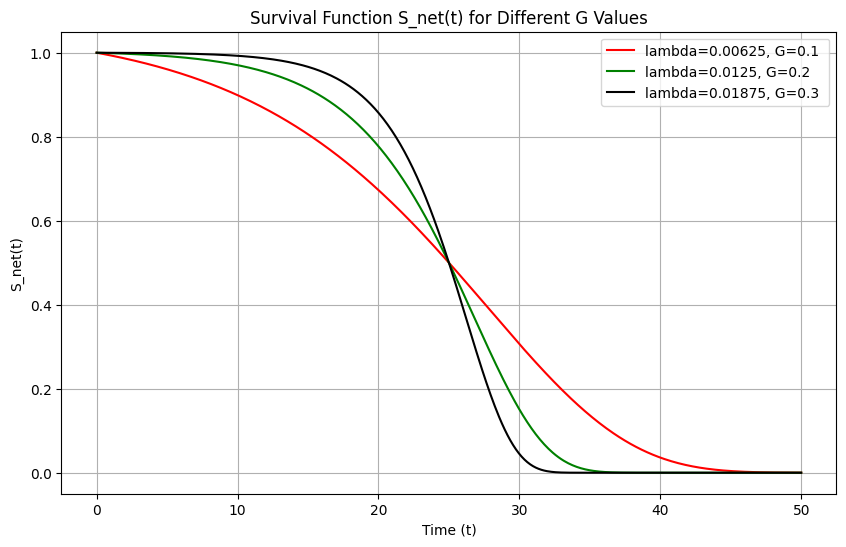

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the survival function S_net(t)
def survival_function(t, R, G):
    return np.exp((R / G) * (1 - np.exp(G * t)))

# Given values
t0_5 = 25

# Combinations for G = 0.1, 0.2, 0.3
combinations = [
    (0.1, 5, 0.8, 0.00625),  # G = 0.1, n = 5, p = 0.8, lambda = 0.00625
    (0.2, 5, 0.8, 0.0125),   # G = 0.2, n = 5, p = 0.8, lambda = 0.0125
    (0.3, 5, 0.8, 0.01875)   # G = 0.3, n = 5, p = 0.8, lambda = 0.01875
]

colors = ['red', 'green', 'black']
t_values = np.linspace(0, 50, 500)  # Time values from 0 to 50

plt.figure(figsize=(10, 6))

for (G, n, p, lambda_value), color in zip(combinations, colors):
    # Calculate R
    R = (np.log(2) * G) / (np.exp(G * t0_5) - 1)
    # Calculate S_net(t)
    S_net = survival_function(t_values, R, G)
    # Plot the survival function
#    plt.plot(t_values, S_net, label=f'G={G}, R={R:.6f}, n={n}, p={p}, lambda={lambda_value}', color=color)
    plt.plot(t_values, S_net, label=f'lambda={lambda_value}, G={G} ', color=color)
    print(f"G = {G}, R = {R}, n = {n}, p = {p}, lambda = {lambda_value}")

# Plot formatting
#plt.axvline(x=t0_5, color='r', linestyle='--', label='t_0.5 = 25')
plt.xlabel('Time (t)')
plt.ylabel('S_net(t)')
plt.title('Survival Function S_net(t) for Different G Values')
plt.legend()
plt.grid(True)
plt.show()


G = 0.1, p = 0.85, lambda = 0.002929, n = 7
G = 0.1, p = 0.85, lambda = 0.003506, n = 6
G = 0.1, p = 0.85, lambda = 0.003579, n = 6
G = 0.1, p = 0.85, lambda = 0.004372, n = 5
G = 0.1, p = 0.85, lambda = 0.004444, n = 5
G = 0.1, p = 0.85, lambda = 0.004517, n = 5
G = 0.1, p = 0.85, lambda = 0.005743, n = 4
G = 0.1, p = 0.85, lambda = 0.005815, n = 4
G = 0.1, p = 0.85, lambda = 0.005887, n = 4
G = 0.1, p = 0.85, lambda = 0.005960, n = 4
G = 0.1, p = 0.85, lambda = 0.006032, n = 4
G = 0.1, p = 0.85, lambda = 0.008413, n = 3
G = 0.1, p = 0.85, lambda = 0.008485, n = 3
G = 0.1, p = 0.85, lambda = 0.008557, n = 3
G = 0.1, p = 0.85, lambda = 0.008629, n = 3
G = 0.1, p = 0.85, lambda = 0.008701, n = 3
G = 0.1, p = 0.85, lambda = 0.008773, n = 3
G = 0.1, p = 0.85, lambda = 0.008846, n = 3
G = 0.1, p = 0.85, lambda = 0.008918, n = 3
G = 0.1, p = 0.85, lambda = 0.008990, n = 3
G = 0.1, p = 0.85, lambda = 0.009062, n = 3
G = 0.1, p = 0.85, lambda = 0.009134, n = 3
G = 0.1, p = 0.85, lambda = 0.00

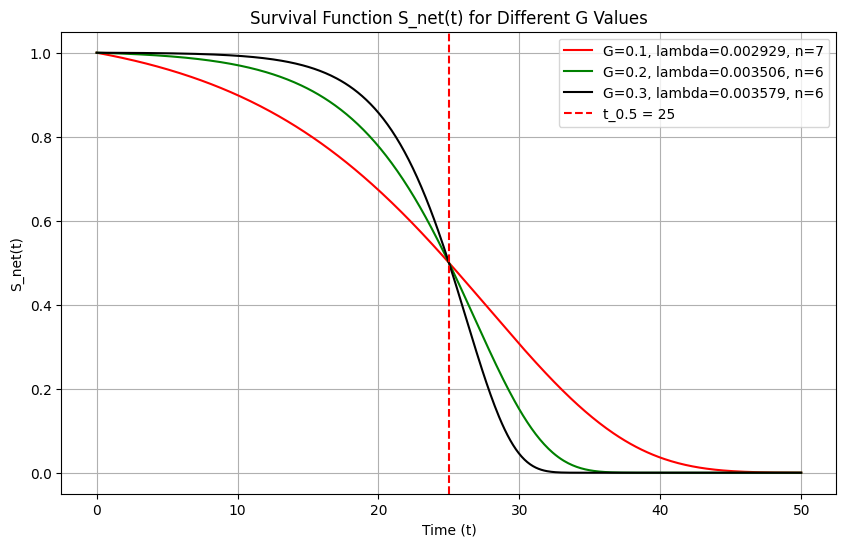

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
p = 0.85
lambda_values = 1/200
G_target = [0.1, 0.2, 0.3]  # Target G values


# Function to calculate n given G, p, and lambda
def calculate_n(G, p, lambda_value):
    n = (G * (1 - p)) / (p * lambda_value) + 1
    return n

# Find combinations of lambda and n for each target G
combinations = []

for G in G_target:
    for lambda_value in lambda_values:
        for n in n_range:
            calculated_n = calculate_n(G, p, lambda_value)
            if np.abs(calculated_n - n) < 0.1:  # Check if the calculated n is close to an integer in the range
                combinations.append((G, p, lambda_value, n))

# Print the results
for G, p, lambda_value, n in combinations:
    print(f"G = {G}, p = {p}, lambda = {lambda_value:.6f}, n = {n}")

# Example: Calculate survival function S(t) for these combinations
def survival_function(t, R, G):
    return np.exp((R / G) * (1 - np.exp(G * t)))

# Define the parameters for the combinations
t_values = np.linspace(0, 50, 500)  # Time values from 0 to 50
colors = ['red', 'green', 'black']
plt.figure(figsize=(10, 6))

# Plot survival functions for the first combination of each G target
for i, G in enumerate(G_target):
    lambda_value = combinations[i][2]
    n = combinations[i][3]
    R = (np.log(2) * G) / (np.exp(G * 25) - 1)
    S_net = survival_function(t_values, R, G)
    plt.plot(t_values, S_net, label=f'G={G}, lambda={lambda_value:.6f}, n={n}', color=colors[i])

# Plot formatting
plt.axvline(x=25, color='r', linestyle='--', label='t_0.5 = 25')
plt.xlabel('Time (t)')
plt.ylabel('S_net(t)')
plt.title('Survival Function S_net(t) for Different G Values')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
p = 0.85
lambda_value = 1 / 200
G_values = [0.1, 0.2, 0.3]

def calculate_n(G, p, lambda_value):
    return 1 + (G * (1 - p)) / (p * lambda_value)

n_values = [calculate_n(G, p, lambda_value) for G in G_values]

for G, n in zip(G_values, n_values):
    print(f"For G = {G}, calculated n = {n:.3f}")


For G = 0.1, calculated n = 4.529
For G = 0.2, calculated n = 8.059
For G = 0.3, calculated n = 11.588


G = 0.1, p = 0.85, lambda = 0.002857, n = 7.176
G = 0.2, p = 0.85, lambda = 0.002857, n = 13.353
G = 0.3, p = 0.85, lambda = 0.002857, n = 19.529


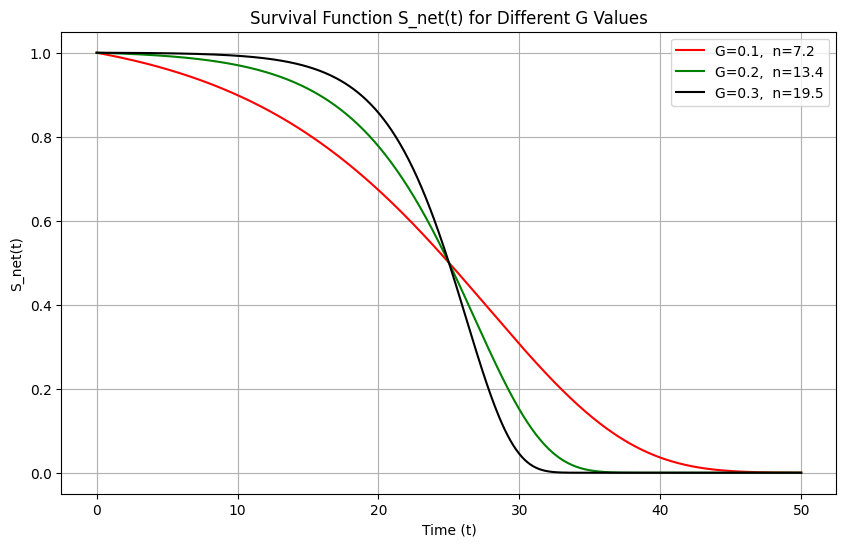

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
p = 0.85
lambda_value = 1 / 350
G_target = [0.1, 0.2, 0.3]  # Target G values

# Function to calculate n given G, p, and lambda
def calculate_n(G, p, lambda_value):
    return (G * (1 - p)) / (p * lambda_value) + 1

# Calculate n values for each target G
n_values = [calculate_n(G, p, lambda_value) for G in G_target]

# Print the results
for G, n in zip(G_target, n_values):
    print(f"G = {G}, p = {p}, lambda = {lambda_value:.6f}, n = {n:.3f}")

# Function to calculate R given G and t0.5
def calculate_R(G, t0_5):
    return (np.log(2) * G) / (np.exp(G * t0_5) - 1)

# Function to calculate the survival function S_net(t)
def survival_function(t, R, G):
    return np.exp((R / G) * (1 - np.exp(G * t)))

# Define the parameters for the combinations
t_values = np.linspace(0, 50, 500)  # Time values from 0 to 50
colors = ['red', 'green', 'black']
plt.figure(figsize=(10, 6))

# Plot survival functions for each combination of G target
t0_5 = 25
for i, (G, n) in enumerate(zip(G_target, n_values)):
    R = calculate_R(G, t0_5)
    S_net = survival_function(t_values, R, G)
    plt.plot(t_values, S_net, label=f'G={G},  n={n:.1f}', color=colors[i])

# Plot formatting
#plt.axvline(x=t0_5, color='r', linestyle='--', label='t_0.5 = 25')
plt.xlabel('Time (t)')
plt.ylabel('S_net(t)')
plt.title('Survival Function S_net(t) for Different G Values')
plt.legend()
plt.grid(True)
plt.show()
